# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    Uninstalling spacy-3.8.7:
      Successfully uninstalled spacy-3.8.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's 

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [2]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [3]:
# Import the first file - True.csv
true_df = pd.read_csv("True.csv")

# Import the second file - Fake.csv
fake_df = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [4]:
# Inspect the DataFrame with True News to understand the given data
print(true_df.info())
true_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017   
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017   
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017

In [5]:
# Inspect the DataFrame with Fake News to understand the given data
print(fake_df.info())
fake_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text               date  
0  Donald Trump just couldn t wish all Americans ...  December 31, 2017  
1  House Intelligence Committee Chairman Devin Nu...  December 31, 2017  
2  On Friday, it was revealed that former Milwauk...  December 30, 2017  
3  On Christmas day, Donald Trump announced that ...  December 29, 2017  
4  Pope Francis used his annual Christmas Day mes...  December 25, 2017

In [6]:
# Print the column details for True News DataFrame
print(true_df.columns)

Index(['title', 'text', 'date'], dtype='object')


In [7]:
# Print the column details for Fake News Dataframe
print(fake_df.columns)

Index(['title', 'text', 'date'], dtype='object')


In [8]:
# Print the column names of both DataFrames
print("True News Columns:", true_df.columns.tolist())
print("Fake News Columns:", fake_df.columns.tolist())

True News Columns: ['title', 'text', 'date']
Fake News Columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [9]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [10]:
# Combine the true and fake news DataFrames into a single DataFrame
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

In [11]:
# Display the first 5 rows of the combined DataFrame to verify the result
combined_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text                date  \
0  WASHINGTON (Reuters) - The head of a conservat...  December 31, 2017    
1  WASHINGTON (Reuters) - Transgender people will...  December 29, 2017    
2  WASHINGTON (Reuters) - The special counsel inv...  December 31, 2017    
3  WASHINGTON (Reuters) - Trump campaign adviser ...  December 30, 2017    
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  December 29, 2017    

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [12]:
# Check Presence of Null Values
combined_df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [13]:
# Handle Rows with Null Values
combined_df = combined_df.dropna()

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [14]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + ' ' + combined_df['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(columns=['title', 'text', 'date'])

# Display the first 5 rows of the updated DataFrame to check the result
combined_df.head()

news_label                                          news_text
0           1  As U.S. budget fight looms, Republicans flip t...
1           1  U.S. military to accept transgender recruits o...
2           1  Senior U.S. Republican senator: 'Let Mr. Muell...
3           1  FBI Russia probe helped by Australian diplomat...
4           1  Trump wants Postal Service to charge 'much mor...

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [18]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import string

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def nltk_clean_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(lemmatized)

df_clean = pd.DataFrame()
df_clean['original_text'] = combined_df['news_text']
df_clean['cleaned_text'] = combined_df['news_text'].apply(nltk_clean_lemmatize)

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = combined_df['news_label']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [19]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\w*\d\w*', '', text)
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [20]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['cleaned_raw'] = df_clean['original_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [23]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

from nltk import pos_tag, word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_nouns(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    filtered = [word for word, tag in tagged if tag in ['NN', 'NNS'] and word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return " ".join(lemmatized)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


### Save the Cleaned data as a csv file (Recommended)

In [28]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean['lemmatized_nouns'] = df_clean['cleaned_raw'].apply(lemmatize_nouns)

In [29]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [30]:
# Check the first few rows of the DataFrame
df_clean.head()

original_text  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                        cleaned_text  news_label  \
0  As U.S. budget fight loom , Republicans flip t...           1   
1  U.S. military to accept transgender recruit on...           1   
2  Senior U.S. Republican senator : 'Let Mr. Muel...           1   
3  FBI Russia probe helped by Australian diplomat...           1   
4  Trump want Postal Service to charge 'much more...           1   

                                         cleaned_raw  \
0  as us budget fight looms republicans flip thei...   
1  us military to accept transgender recruits on ...   
2  senior us republican senator let mr mueller do...   
3  fbi russia probe helped by australian diplomat...   
4  trump wants postal service to charge much more...   

                                    lemmatized_nouns  
0  budget fight republican script washington head...  
1  transgender recruit monday washington reuters ...  
2  senator job washington counsel investigation l...  
3  fbi russia probe diplomat tipoff washington re...  
4  trump service amazon shipment reuters presiden...

In [31]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 5)

In [32]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   original_text     44898 non-null  object
 1   cleaned_text      44898 non-null  object
 2   news_label        44898 non-null  int64 
 3   cleaned_raw       44898 non-null  object
 4   lemmatized_nouns  44889 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [33]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df_clean, test_size=0.3, random_state=42, stratify=df_clean['news_label'])

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [34]:
# Add a new column to calculate the character length of cleaned news text
train_df['cleaned_char_len'] = train_df['cleaned_raw'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
train_df['lemmatized_char_len'] = train_df['lemmatized_nouns'].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

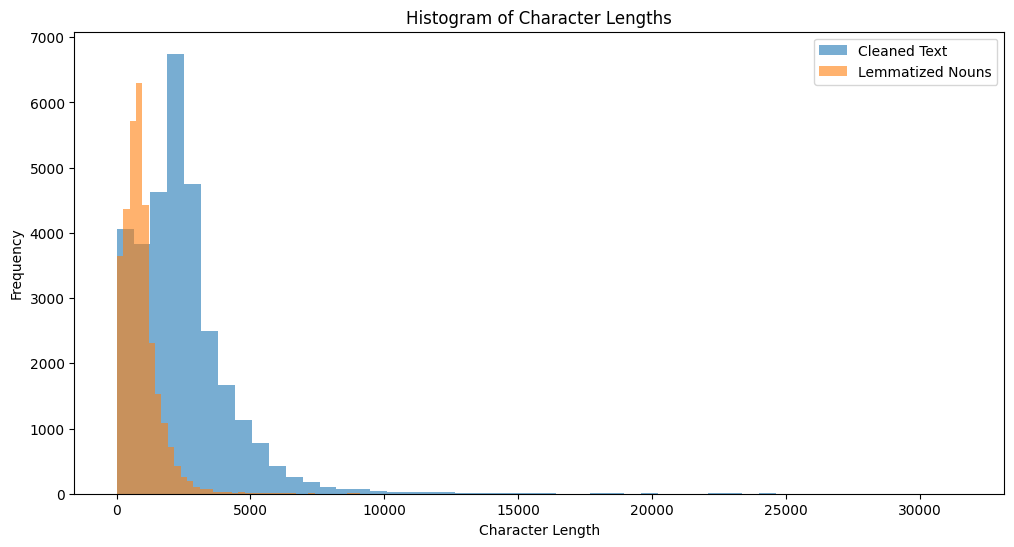

In [35]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed

plt.figure(figsize=(12, 6))
plt.hist(train_df['cleaned_char_len'], bins=50, alpha=0.6, label='Cleaned Text')
plt.hist(train_df['lemmatized_char_len'], bins=50, alpha=0.6, label='Lemmatized Nouns')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Histogram of Character Lengths')
plt.legend()
plt.show()



### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

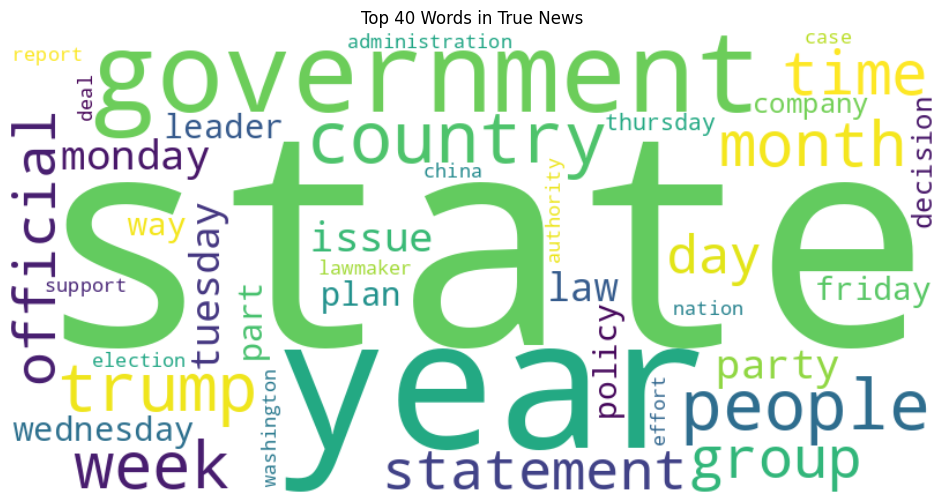

In [36]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News

from wordcloud import WordCloud

true_text = train_df[train_df['news_label'] == 1]['lemmatized_nouns'].dropna().astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News")
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

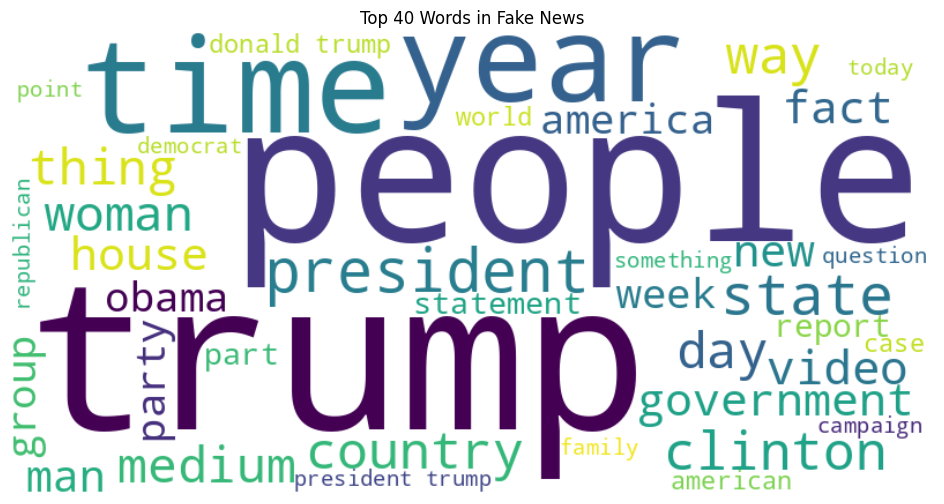

In [37]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News

fake_text = train_df[train_df['news_label'] == 0]['lemmatized_nouns'].dropna().astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News")
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [38]:
# Write a function to get the specified top n-grams

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, ngram_range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [39]:
# Handle NaN values in the text data
train_df['lemmatized_nouns'] = train_df['lemmatized_nouns'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

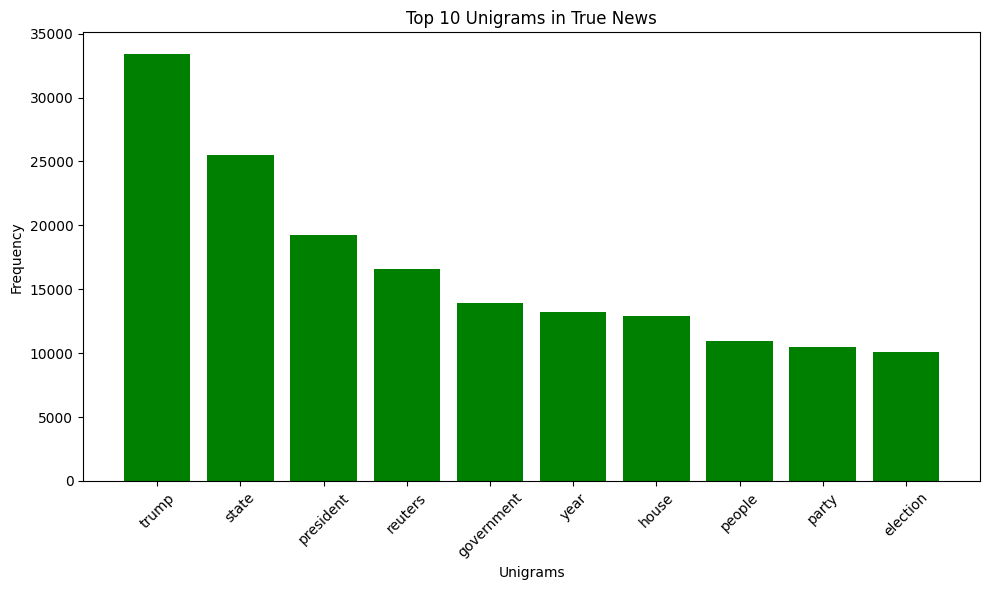

In [40]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

true_news_corpus = train_df[train_df['news_label'] == 1]['lemmatized_nouns']
top_unigrams_true = get_top_ngrams(true_news_corpus, ngram_range=(1, 1), n=10)

words, freqs = zip(*top_unigrams_true)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='green')
plt.title("Top 10 Unigrams in True News")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



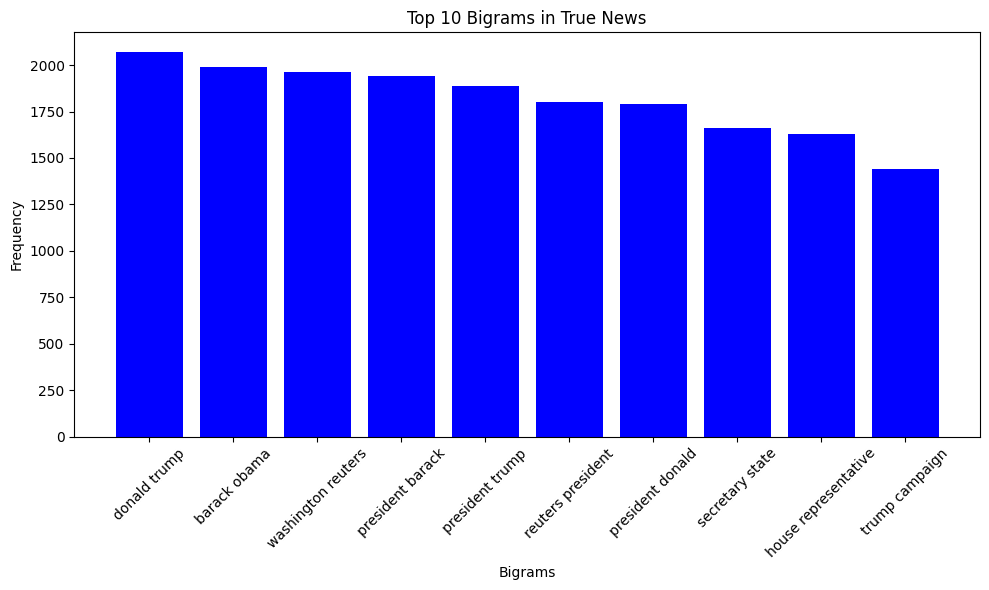

In [41]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

top_bigrams_true = get_top_ngrams(true_news_corpus, ngram_range=(2, 2), n=10)

words, freqs = zip(*top_bigrams_true)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='blue')
plt.title("Top 10 Bigrams in True News")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



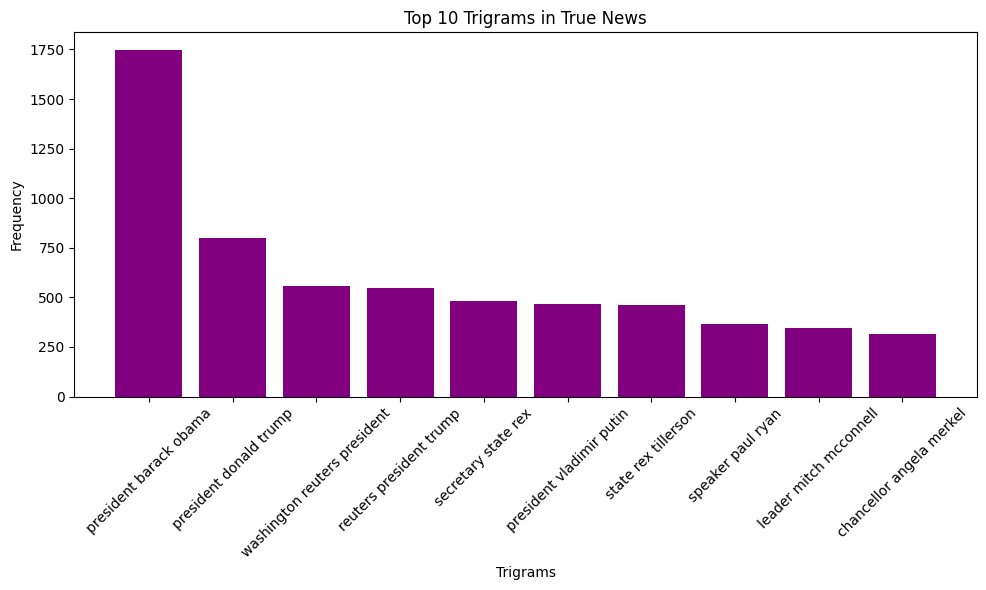

In [42]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

top_trigrams_true = get_top_ngrams(true_news_corpus, ngram_range=(3, 3), n=10)

words, freqs = zip(*top_trigrams_true)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='purple')
plt.title("Top 10 Trigrams in True News")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

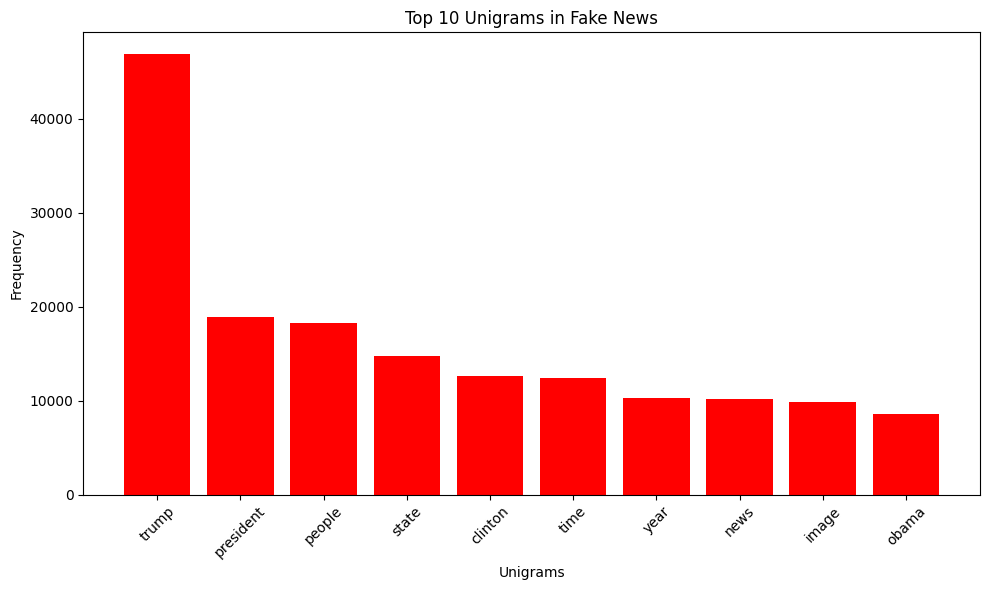

In [43]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

fake_news_corpus = train_df[train_df['news_label'] == 0]['lemmatized_nouns']
top_unigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(1, 1), n=10)

words, freqs = zip(*top_unigrams_fake)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='red')
plt.title("Top 10 Unigrams in Fake News")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



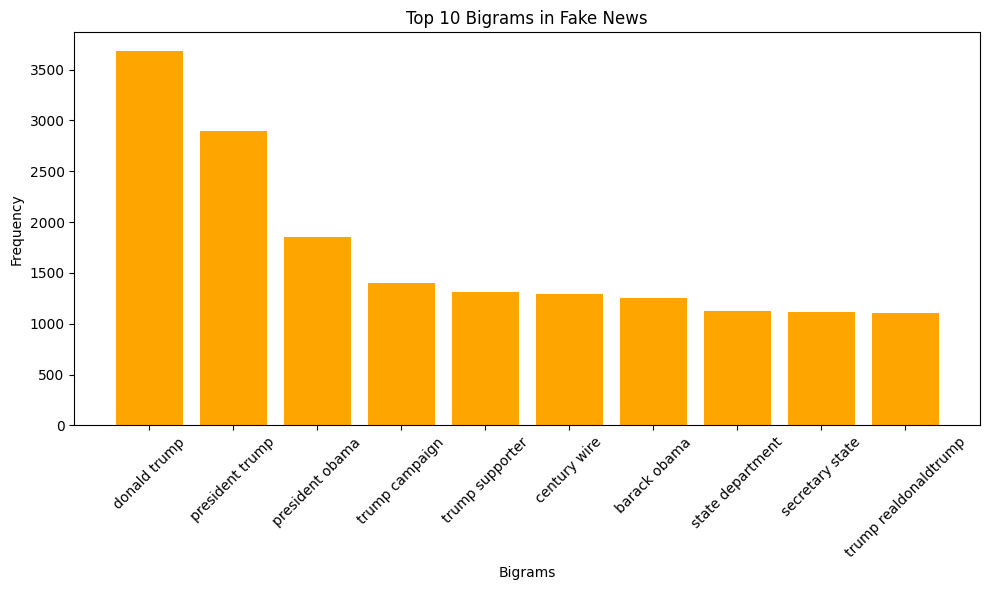

In [45]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

top_bigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(2, 2), n=10)

words, freqs = zip(*top_bigrams_fake)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='orange')
plt.title("Top 10 Bigrams in Fake News")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



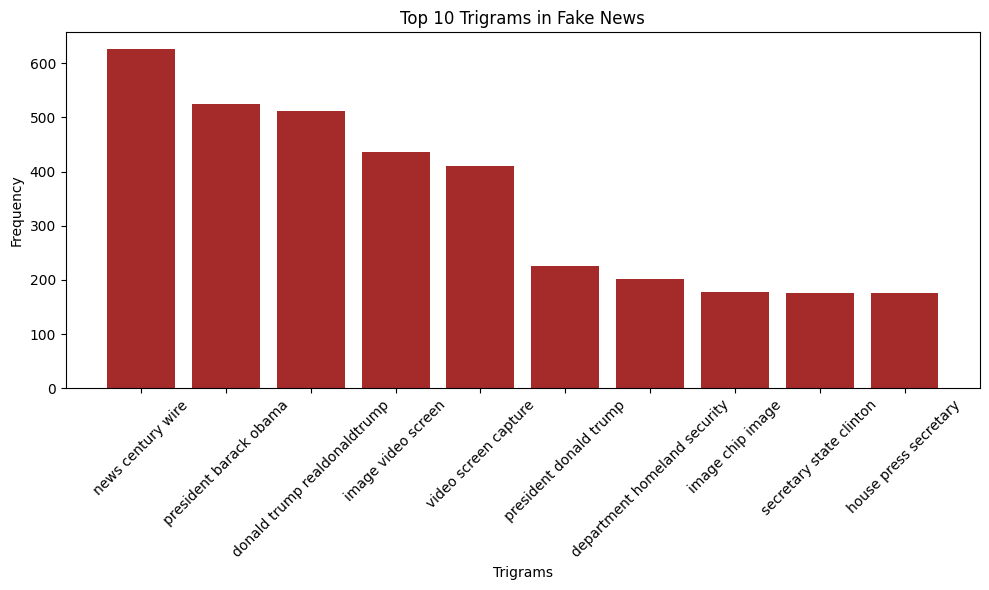

In [46]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

top_trigrams_fake = get_top_ngrams(fake_news_corpus, ngram_range=(3, 3), n=10)

words, freqs = zip(*top_trigrams_fake)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='brown')
plt.title("Top 10 Trigrams in Fake News")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [47]:
# Add a new column to calculate the character length of cleaned news text
df_clean['cleaned_char_len'] = df_clean['cleaned_raw'].str.len()

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['lemmatized_char_len'] = df_clean['lemmatized_nouns'].str.len()

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

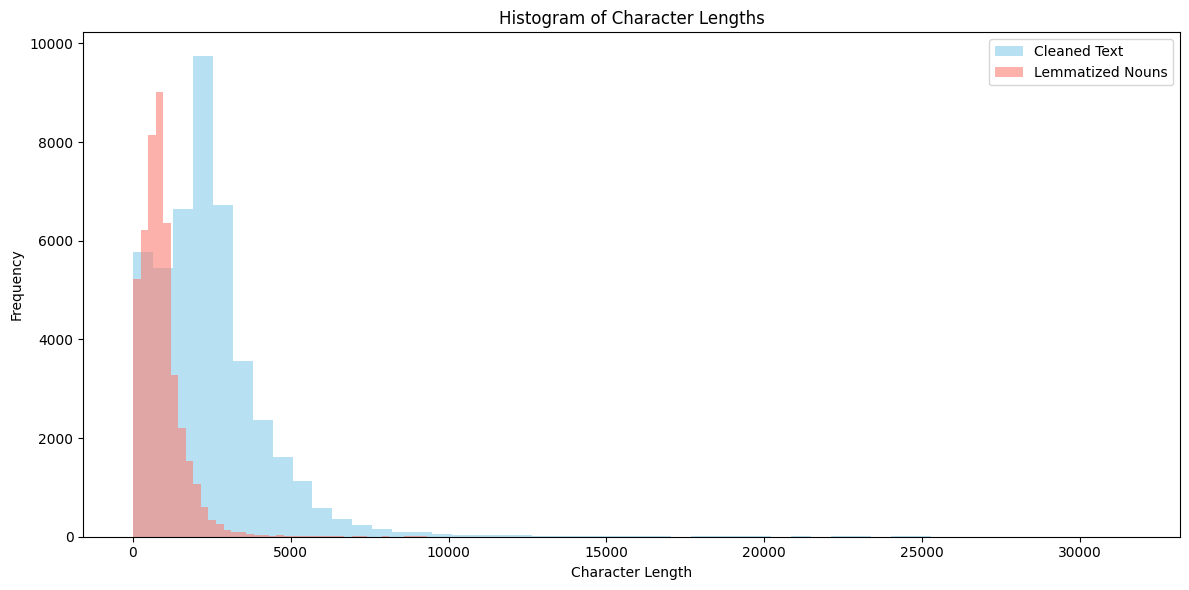

In [48]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed

plt.figure(figsize=(12, 6))
plt.hist(df_clean['cleaned_char_len'], bins=50, alpha=0.6, label='Cleaned Text', color='skyblue')
plt.hist(df_clean['lemmatized_char_len'], bins=50, alpha=0.6, label='Lemmatized Nouns', color='salmon')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Histogram of Character Lengths')
plt.legend()
plt.tight_layout()
plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

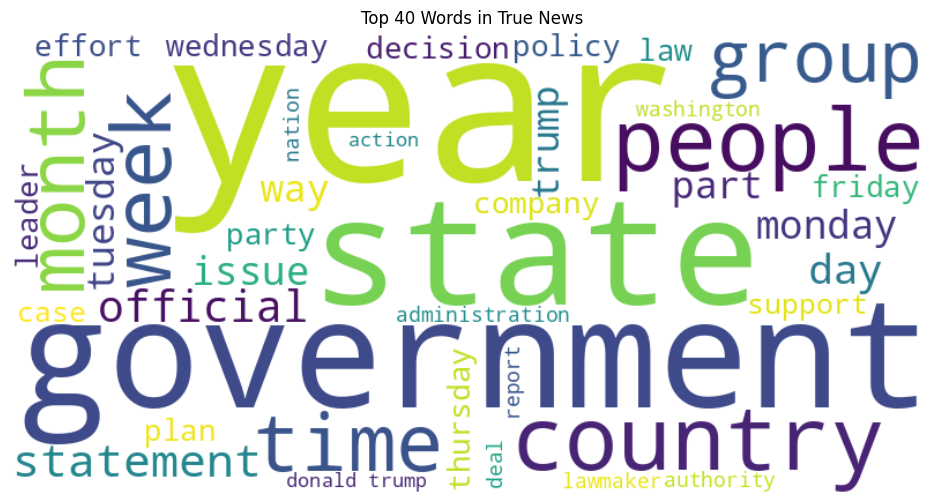

In [49]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News

true_text_all = df_clean[df_clean['news_label'] == 1]['lemmatized_nouns'].dropna().astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_text_all)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News")
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

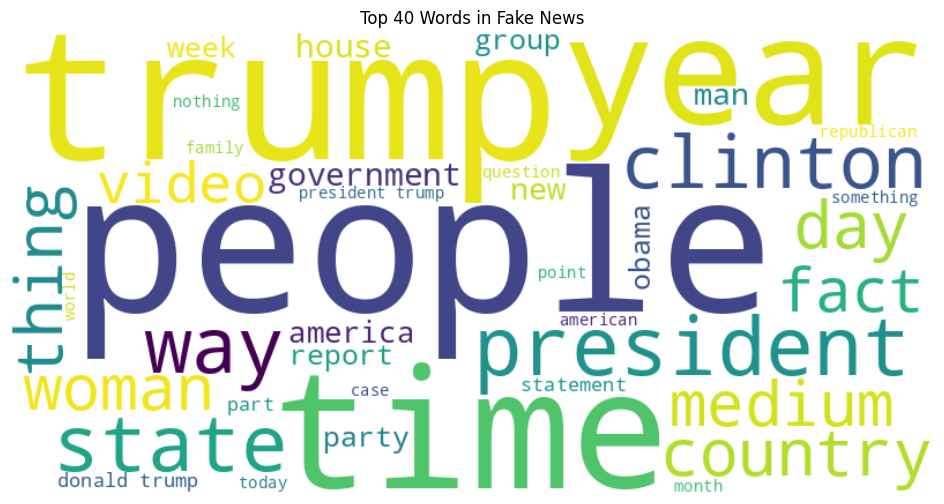

In [50]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News

fake_text_all = df_clean[df_clean['news_label'] == 0]['lemmatized_nouns'].dropna().astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text_all)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News")
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [51]:
## Write a function to get the specified top n-grams

def get_top_ngrams(corpus, ngram_range=(1,1), n=None):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx])
        for word, idx in vectorizer.vocabulary_.items()
    ]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

##### 5.3.2 Handle the NaN values

In [52]:
## First handle NaN values in the text data

df_clean['lemmatized_nouns'] = df_clean['lemmatized_nouns'].fillna('')

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

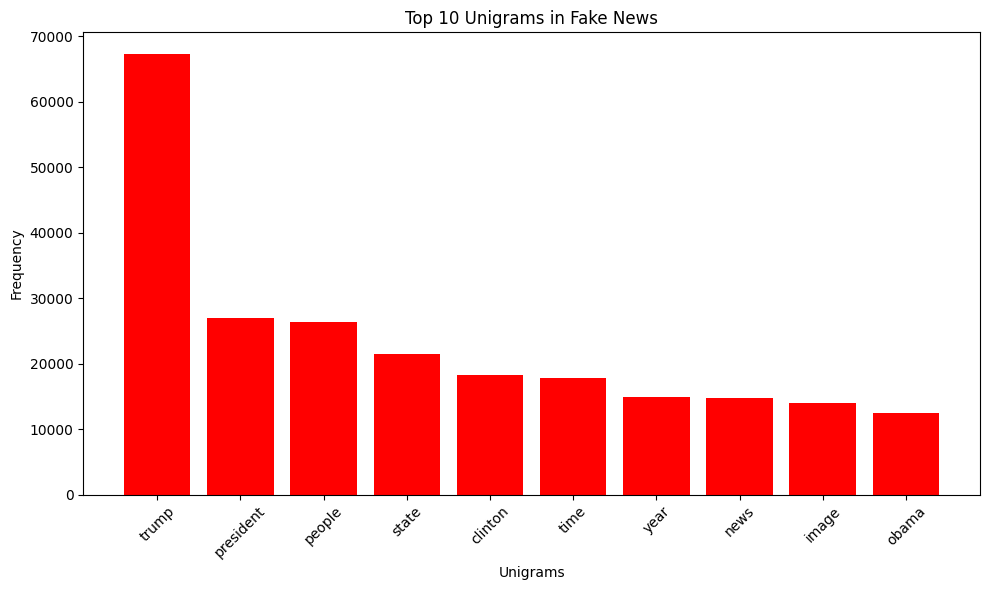

In [53]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

fake_corpus = df_clean[df_clean['news_label'] == 0]['lemmatized_nouns']
top_unigrams_fake = get_top_ngrams(fake_corpus, ngram_range=(1, 1), n=10)

words, freqs = zip(*top_unigrams_fake)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='red')
plt.title("Top 10 Unigrams in Fake News")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

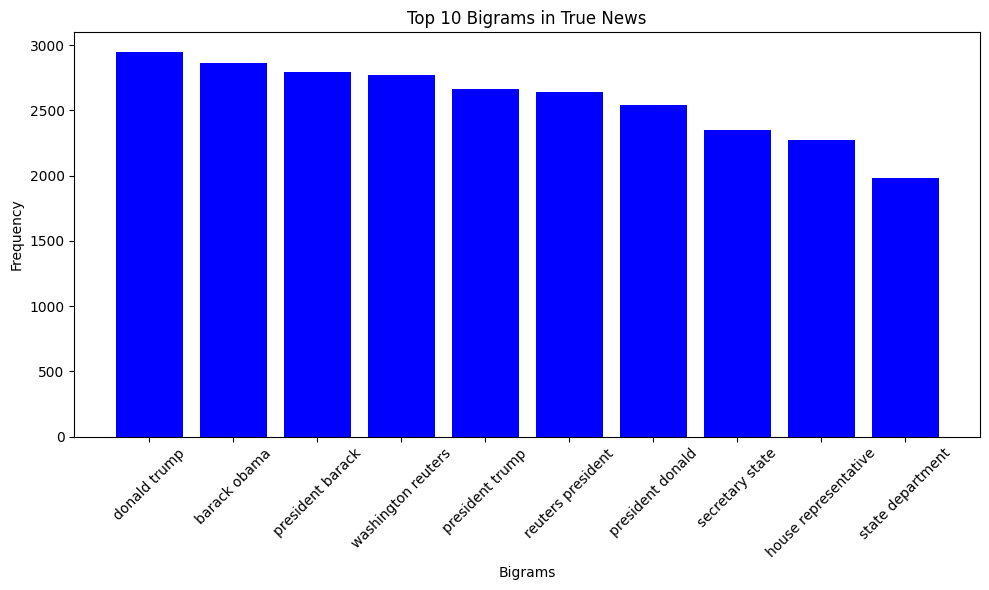

In [54]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

true_corpus = df_clean[df_clean['news_label'] == 1]['lemmatized_nouns']
top_bigrams_true = get_top_ngrams(true_corpus, ngram_range=(2, 2), n=10)

words, freqs = zip(*top_bigrams_true)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='blue')
plt.title("Top 10 Bigrams in True News")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

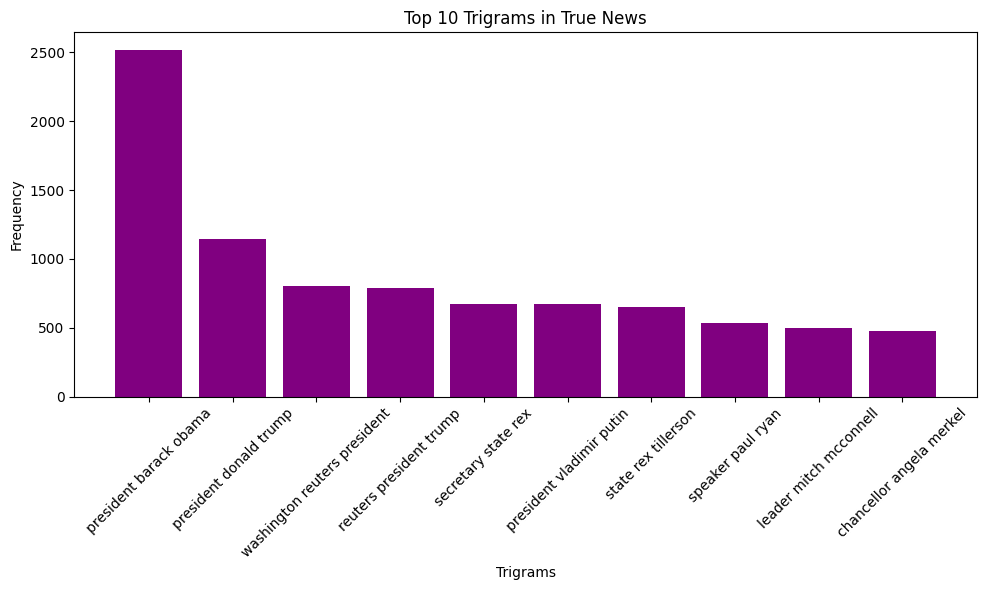

In [55]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

top_trigrams_true = get_top_ngrams(true_corpus, ngram_range=(3, 3), n=10)

words, freqs = zip(*top_trigrams_true)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='purple')
plt.title("Top 10 Trigrams in True News")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

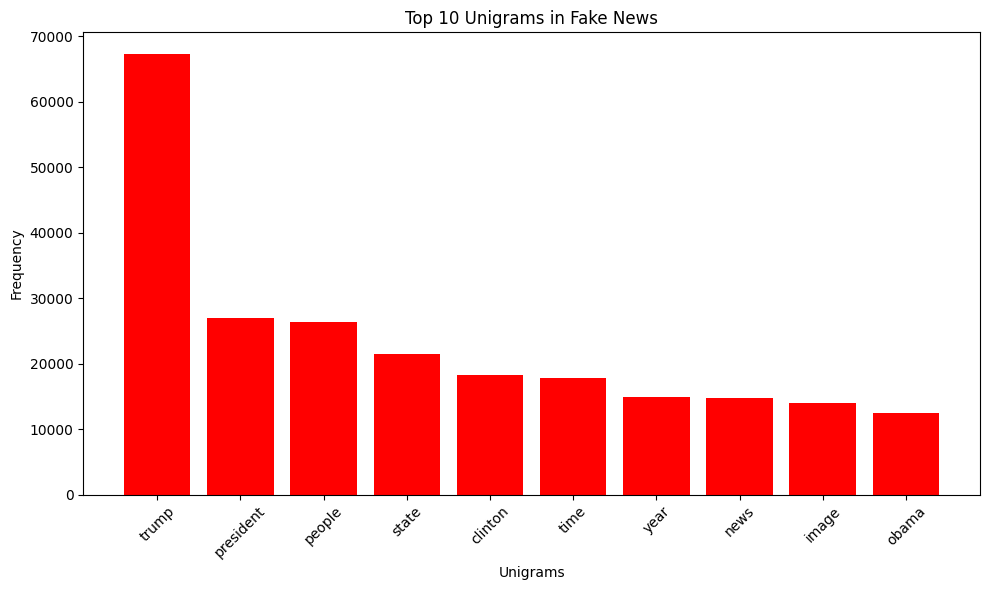

In [56]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph

fake_corpus = df_clean[df_clean['news_label'] == 0]['lemmatized_nouns']
top_unigrams_fake = get_top_ngrams(fake_corpus, ngram_range=(1, 1), n=10)

words, freqs = zip(*top_unigrams_fake)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='red')
plt.title("Top 10 Unigrams in Fake News")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

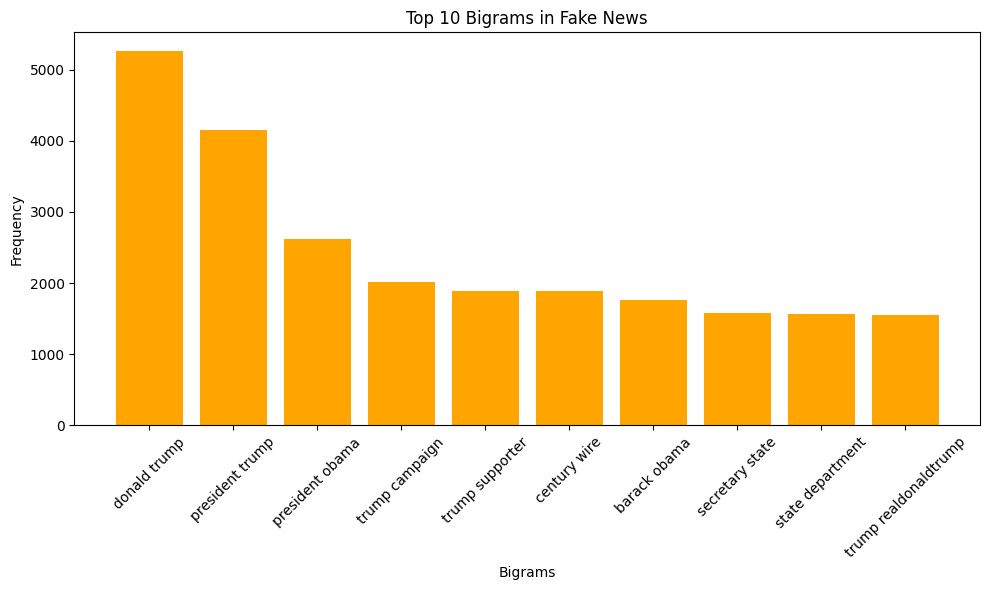

In [57]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

top_bigrams_fake = get_top_ngrams(fake_corpus, ngram_range=(2, 2), n=10)

words, freqs = zip(*top_bigrams_fake)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='orange')
plt.title("Top 10 Bigrams in Fake News")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

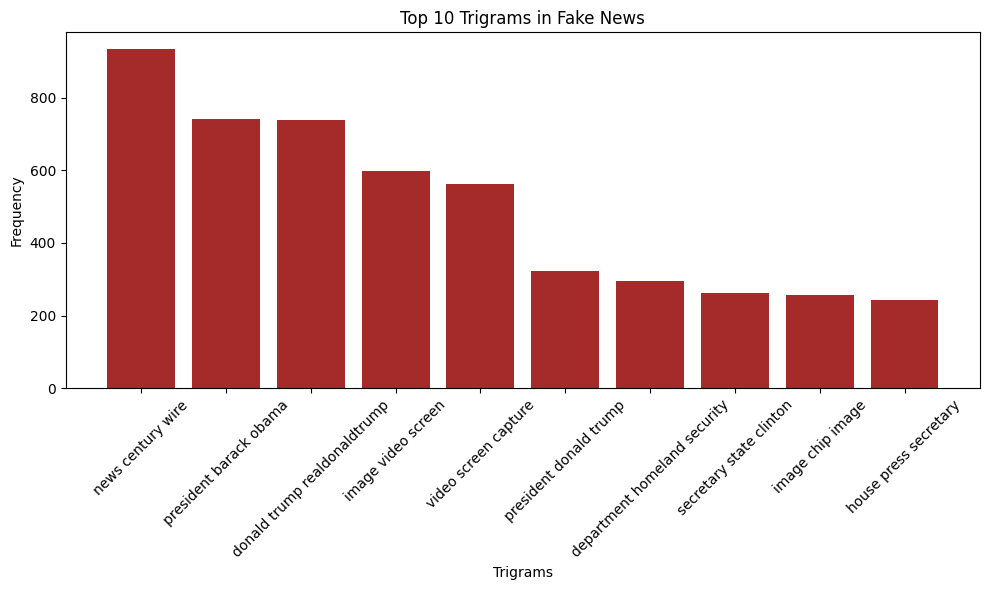

In [58]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph

top_trigrams_fake = get_top_ngrams(fake_corpus, ngram_range=(3, 3), n=10)

words, freqs = zip(*top_trigrams_fake)
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='brown')
plt.title("Top 10 Trigrams in Fake News")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [60]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
! pip install gensim
import gensim.downloader as api

w2v_model = api.load("word2vec-google-news-300")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 57.7 MB/s eta 0:00:00
[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [62]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data


## Extract the target variable for the training data and validation data

train_texts = train_df['lemmatized_nouns'].fillna('').astype(str)
val_texts = val_df['lemmatized_nouns'].fillna('').astype(str)

def document_vector(doc, model):
    words = doc.split()
    words = [word for word in words if word in model]
    if len(words) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model[words], axis=0)

X_train = np.array([document_vector(text, w2v_model) for text in train_texts])
X_val = np.array([document_vector(text, w2v_model) for text in val_texts])

y_train = train_df['news_label'].values
y_val = val_df['news_label'].values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [64]:
## Initialise Logistic Regression model

## Train Logistic Regression model on training data

## Predict on validation data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [65]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9321
Precision: 0.9232
Recall   : 0.9356
F1 Score : 0.9293


In [66]:
# Classification Report
print(classification_report(y_val, y_pred, target_names=["Fake News", "True News"]))

              precision    recall  f1-score   support

   Fake News       0.94      0.93      0.93      7045
   True News       0.92      0.94      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [67]:
## Initialise Decision Tree model

## Train Decision Tree model on training data

## Predict on validation data
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [68]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels

accuracy = accuracy_score(y_val, y_pred_dt)
precision = precision_score(y_val, y_pred_dt)
recall = recall_score(y_val, y_pred_dt)
f1 = f1_score(y_val, y_pred_dt)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.8455
Precision: 0.8490
Recall   : 0.8224
F1 Score : 0.8355


In [69]:
# Classification Report

print(classification_report(y_val, y_pred_dt, target_names=["Fake News", "True News"]))

              precision    recall  f1-score   support

   Fake News       0.84      0.87      0.85      7045
   True News       0.85      0.82      0.84      6425

    accuracy                           0.85     13470
   macro avg       0.85      0.84      0.84     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [71]:
## Initialise Random Forest model

## Train Random Forest model on training data

## Predict on validation data

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [72]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.9302
Precision: 0.9355
Recall   : 0.9169
F1 Score : 0.9261


In [73]:
# Classification Report
print(classification_report(y_val, y_pred_rf, target_names=["Fake News", "True News"]))

              precision    recall  f1-score   support

   Fake News       0.93      0.94      0.93      7045
   True News       0.94      0.92      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Semantic classification effectively captured contextual nuances in news text, enabling accurate differentiation between fake and true news. Across the models tested, Logistic Regression and Random Forest both achieved high accuracy (93%) and balanced F1-scores (0.93) for both classes, while Decision Tree lagged behind with an 85% accuracy and lower F1-scores. Random Forest was chosen as the best model due to its consistent precision and recall across classes and robustness against variance. The macro F1-score was prioritized to ensure balanced performance, particularly important for minimizing both false positives and false negatives. Overall, the semantic approach proved impactful in enhancing fake news detection by leveraging deeper language understanding.
